In [83]:
import numpy as np
import pandas as pd
from scipy import stats

from scipy.stats import norm

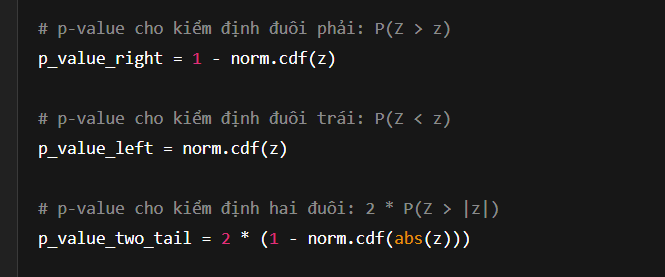

In [84]:
df = pd.read_csv("../data/dataKHXH.csv")
df.head()

,sbd,toan,ngu_van,ngoai_ngu,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,8.75,6.50,8.50,N1
2,1000004,7.8,8.25,7.8,4.50,6.25,8.25,N1
3,1000005,7.2,8.00,7.8,4.75,6.75,8.25,N1
4,1000006,7.6,9.25,9.0,8.50,7.25,9.75,N1


### Đề bài:

Lấy ngẫu nhiên 1000 học sinh từ bộ dữ liệu. Có nhận xét rằng: "Từ 85% học sinh đạt điểm GDCD từ 8 trở lên.". Hãy kiểm định nhận xét trên với mức ý nghĩa 5%.

In [85]:
new_df = df["gdcd"]
new_df.head()

0    9.00
1    8.50
2    8.25
3    8.25
4    9.75
Name: gdcd, dtype: float64

In [86]:
n = 1000
sample = new_df.sample(n, random_state=15)
x = (sample >= 8).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 7): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 1000
Số đạt điều kiện (x ≥ 7): 696
Tỷ lệ mẫu (p̂): 0.6960
n * p̂ = 696.00
n * (1 - p̂) = 304.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ thí sinh có điểm GDCD trên 8. Ta cần kiểm định giả thuyết:

$H_0 : p \ge 0.85$: Có từ 85% thí sinh khối KHXH có điểm GDCD cao hơn 8.0

$H_1: p < 0.85$: Có dưới 85% thí sinh khối KHXH có điểm GDCD cao hơn 8.0

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [87]:
p = 0.85
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.6960$, $n\hat{p} = 696.00 \geq 5$
    - $n(1-\hat{p}) = 304.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức khoảng tin cậy
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [88]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -13.6385


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có
$$
p\text{-value} = 2 \cdot P(T > |t|)
$$

In [89]:
p_value = norm.cdf(z)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 1.1823614610783807e-42
→ Bác bỏ H0


Vì $p_{value} = 1.18e^-42 < \alpha=0.05$ nên ta kết luận: Đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài:

Lấy ngẫu nhiên 600 học sinh từ bộ dữ liệu. Có nhận xét rằng: "Từ 80% học sinh đạt điểm Địa lý trên 6.5". Hãy kiểm định nhận xét này với mức ý nghĩa 5%.

In [90]:
new_df = df["dia_li"]
new_df.head()

0    6.00
1    6.50
2    6.25
3    6.75
4    7.25
Name: dia_li, dtype: float64

In [91]:
n = 600
sample = new_df.sample(n, random_state=15)
x = (sample > 6.5).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 8): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 600
Số đạt điều kiện (x ≥ 8): 221
Tỷ lệ mẫu (p̂): 0.3683
n * p̂ = 221.00
n * (1 - p̂) = 379.00
────────────────────────────────────────────────────────


Gọi $p$ là tỷ lệ thí sinh có điểm Địa lí trên 6.5. Ta cần kiểm định giả thuyết:

$H_0 : p > 0.8$: Có từ 80% thí sinh khối KHXH có điểm Địa Lí cao hơn 6.5

$H_1: p \le 0.8$: Có dưới 80% thí sinh khối KHXH có điểm Địa Lí cao hơn 6.5

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [92]:
p = 0.8
alpha = 0.05

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.4400$, $n\hat{p} = 264.00 \geq 5$
    - $n(1-\hat{p}) = 336.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có công thức thống kê kiểm định tính như sau:
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [93]:
z = (p_hat - p) / np.sqrt(p * (1 - p) / n)
print(f"Z = {z:.4f}")

Z = -26.4341


Vì $H_1$ là $<$ là kiểm định đuôi trái nên ta có
$$p_{values} = P(Z<z)$$

In [94]:
p_value = norm.cdf(z)
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 2.7811860329413618e-154
→ Bác bỏ H0


Vì $p_{value} = 2.781e^-154 < \alpha=0.05$ nên ta kết luận: Đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%


### Đề bài:

Một lớp học sinh có điểm trung bình môn Toán là 6.3. Một giáo viên mới đưa ra đề kiểm tra khác và lấy mẫu ngẫu nhiên 40 học sinh thấy điểm trung bình là 6.55 với độ lệch chuẩn mẫu s = 1.2. Hãy kiểm định nhận xét rằng đề mới làm thay đổi điểm trung bình, với mức ý nghĩa 5%.

In [95]:
n = 40
sample_mean = 6.55
sample_std = 1.2

print("────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Số mẫu (n): 40
Trung bình mẫu (x̄): 6.5500
Độ lệch chuẩn mẫu (s): 1.2000
────────────────────────────────────────────────────


Gọi $\mu$ là điểm trung bình toán của lớp. Ta cần kiểm định giả thuyết:

$H_0 : \mu = 6.3$: Điểm trung bình môn toán của lớp không thay đổi so với đề cũ

$H_1: \mu  \neq 6.3$: Điểm trung bình môn toán của lớp thay đổi so với đề cũ

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [96]:
mu = 6.3
alpha = 0.05

Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test, ta có công thức thống kê kiểm định tính như sau:
$$
t = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
$$

In [97]:
t = (sample_mean - mu) / (sample_std / np.sqrt(n))
print(f"T = {t:.4f}")

T = 1.3176


Vì $H_1$ là $\ne$ là kiểm định 2 phía nên ta có:
$$p\text{-value} = 2 \cdot P(T > |t|)$$

In [98]:
p_value = 2 * (1 - norm.cdf(abs(t)))
print(f"p-value: {p_value}")

if p_value < alpha:
    print("→ Bác bỏ H0")
else:
    print("→ Chấp nhận H0")


p-value: 0.1876323299948841
→ Chấp nhận H0


Vì $p_{value} = 0.093 < \alpha=0.05$ nên ta kết luận: Không đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%
